In [25]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [26]:
logs = pd.read_csv('3_logs.csv', encoding='windows-1251')

In [146]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


### Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

### Вопрос: Сколько уникальных значений принимает переменная platform?

In [31]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [195]:
logs333 = logs.groupby('client').agg({'client': 'value_counts'})
logs333

,,client
client,client,
40,40,1
50,50,1
75,75,1
81,81,1
132,132,1
...,...,...
99927,99927,1
99931,99931,1
99952,99952,1


### Какой клиент совершил больше всего успешных операций?

### Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. 

In [194]:
logs_111 = logs.query('success == True')\
                                    .agg({'client': 'value_counts'})\
                                    .sort_values(by = 'client', ascending=False).head(22)
logs_111

,client
36165,41
61468,41
12179,41
61473,41
78349,41
28719,41
92584,41
52870,41
82563,41
64064,40


### С какой платформы осуществляется наибольшее количество успешных операций?

In [197]:
logs444 = logs.groupby('platform').agg({'success': 'value_counts'})
logs444

success
platform success         
computer True        1090
         False        415
phone    True        2019
         False        734
tablet   True         180
         False         62

In [171]:
ud  = pd.read_csv('3_user_data.csv', encoding='windows-1251')

In [198]:
ud

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [30]:
logs_unique = logs.nunique
logs_unique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [199]:
fulldf = logs.merge(ud, on = 'client')

In [200]:
fulldf

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


### Какая платформа наиболее популярна среди премиумных клиентов?

In [213]:
fulldf1 = fulldf.query('success == True').agg({'platform': 'value_counts'})
fulldf1

,platform
phone,1565
computer,843
tablet,139


### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


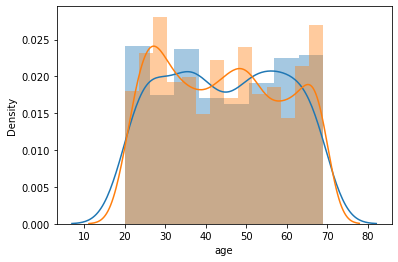

In [210]:
response_prem = fulldf['premium'] == True
response_usual = fulldf['premium'] == False

ax = sns.distplot(fulldf.age[response_prem])
ax = sns.distplot(fulldf.age[response_usual])

### Постройте график распределения числа успешных операций: 

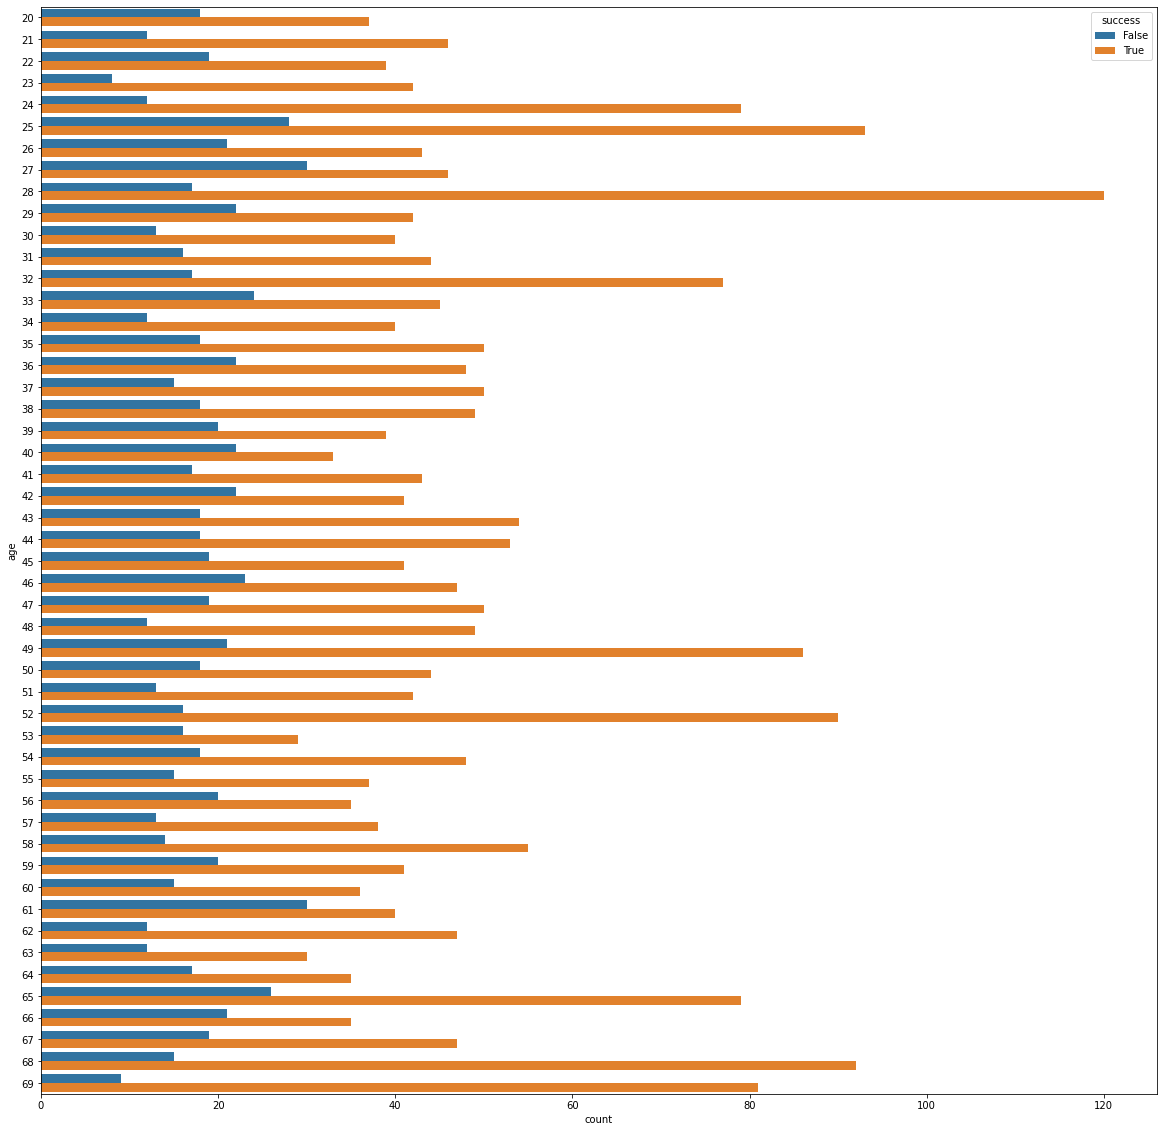

In [221]:
plt.figure(figsize=(20,20))
ax = sns.countplot(y='age', hue='success', data=fulldf)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


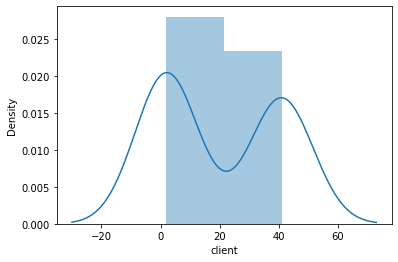

In [222]:
ax = sns.distplot(logs_111.client)